In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_dense_adj
from torch_geometric.transforms import NormalizeFeatures
from nn import GCNLayer, GCN, NodeEmbeddings

In [2]:
# create the adjaceny matrix from the edge index
def create_adj(edge_index, num_nodes):
    # edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    adj = np.zeros((num_nodes, num_nodes), dtype=int)
    for i, j in edge_index:
        adj[i-1, j-1] = 1
        adj[j-1, i-1] = 1
    
    adj = torch.tensor(adj, dtype=torch.float) + torch.eye(num_nodes)
    return adj

data = np.loadtxt("ucidata-zachary/out.ucidata-zachary", dtype=int, skiprows=2)

num_nodes = 34
features_dim = 2
adj = create_adj(data, num_nodes)

# initialize random features
# features = torch.randn(num_nodes, 2)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
labels = [0 if i in labels else 1 for i in range(num_nodes)]
labels = torch.tensor(labels, dtype=torch.long)

In [18]:
# model and optimizer
model = GCN(nin=features_dim, nout=16, nhid=16, nclass=2, num_nodes=num_nodes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [19]:
print(model.features())

Parameter containing:
tensor([[ 6.1482e-01, -1.0152e+00],
        [ 8.1750e-02, -6.1040e-02],
        [ 1.3609e+00,  3.3338e-01],
        [ 2.3698e-01,  7.8027e-01],
        [-2.5318e+00, -6.7601e-01],
        [ 1.5332e+00, -6.3900e-01],
        [ 1.5292e+00, -6.9104e-01],
        [ 1.4784e-01,  3.7462e-01],
        [-9.6420e-01,  1.2861e-01],
        [-1.0124e+00, -5.5136e-01],
        [ 5.1655e-01,  1.9194e+00],
        [-9.1141e-01, -1.1384e-01],
        [-1.8334e-01, -1.0092e+00],
        [ 1.0183e+00, -2.5362e+00],
        [ 1.2331e+00, -8.7166e-01],
        [-1.1795e-01,  1.6083e+00],
        [ 8.2189e-01,  1.0713e+00],
        [ 9.5403e-01, -1.6700e+00],
        [ 5.6163e-02,  1.3677e+00],
        [-1.4938e+00,  3.1018e-01],
        [ 2.2703e+00,  1.2076e-03],
        [ 1.1696e+00,  9.9946e-01],
        [ 2.5596e-02, -6.3931e-01],
        [-1.7113e+00, -4.7047e-01],
        [-1.3401e-01, -2.3803e+00],
        [ 1.4117e+00,  5.8585e-01],
        [-3.5433e-01,  1.5712e+00],
      

In [29]:
# train the model
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = model(adj)           # n x 2
    loss = F.cross_entropy(output, labels)  # for each node, cross entropy loss compares the probability of the labels to the true label
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")



Epoch: 0, Loss: 3.052846295759082e-05
Epoch: 1, Loss: 3.0433833671850152e-05
Epoch: 2, Loss: 3.0332203095895238e-05
Epoch: 3, Loss: 3.0241084459703416e-05
Epoch: 4, Loss: 3.0142953619360924e-05
Epoch: 5, Loss: 3.0048327971599065e-05
Epoch: 6, Loss: 2.9950197131256573e-05
Epoch: 7, Loss: 2.9859074857085943e-05
Epoch: 8, Loss: 2.9764449209324084e-05
Epoch: 9, Loss: 2.967333057313226e-05
Epoch: 10, Loss: 2.957519973278977e-05
Epoch: 11, Loss: 2.9487582651199773e-05
Epoch: 12, Loss: 2.9392958822427318e-05
Epoch: 13, Loss: 2.9301836548256688e-05
Epoch: 14, Loss: 2.9203700250945985e-05
Epoch: 15, Loss: 2.9116084988345392e-05
Epoch: 16, Loss: 2.9021455702604726e-05
Epoch: 17, Loss: 2.8930337066412903e-05
Epoch: 18, Loss: 2.8846223358414136e-05
Epoch: 19, Loss: 2.8755101084243506e-05
Epoch: 20, Loss: 2.8667482183664106e-05
Epoch: 21, Loss: 2.8576359909493476e-05
Epoch: 22, Loss: 2.8485237635322846e-05
Epoch: 23, Loss: 2.839411172317341e-05
Epoch: 24, Loss: 2.8306491003604606e-05
Epoch: 25, Los

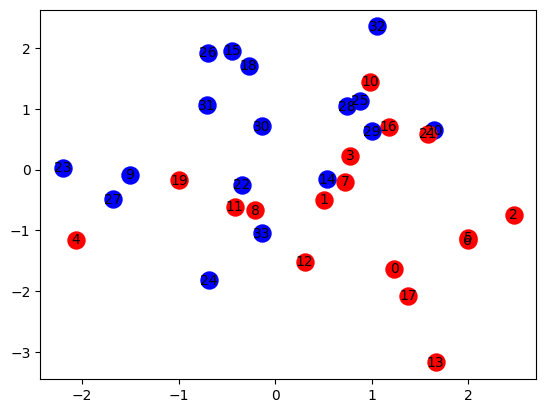

Parameter containing:
tensor([[ 1.2333, -1.6389],
        [ 0.5105, -0.4998],
        [ 2.4734, -0.7434],
        [ 0.7815,  0.2291],
        [-2.0650, -1.1528],
        [ 2.0021, -1.1217],
        [ 1.9950, -1.1680],
        [ 0.7257, -0.2084],
        [-0.2057, -0.6740],
        [-1.5077, -0.0893],
        [ 0.9851,  1.4398],
        [-0.4191, -0.6120],
        [ 0.3078, -1.5205],
        [ 1.6651, -3.1753],
        [ 0.5368, -0.1630],
        [-0.4485,  1.9483],
        [ 1.1786,  0.6977],
        [ 1.3816, -2.0840],
        [-0.2727,  1.7060],
        [-0.9969, -0.1773],
        [ 1.6470,  0.6467],
        [ 1.5838,  0.5867],
        [-0.3467, -0.2532],
        [-2.2002,  0.0329],
        [-0.6874, -1.8236],
        [ 0.8782,  1.1289],
        [-0.6949,  1.9247],
        [-1.6831, -0.4884],
        [ 0.7422,  1.0406],
        [ 1.0032,  0.6263],
        [-0.1384,  0.7124],
        [-0.7050,  1.0561],
        [ 1.0608,  2.3534],
        [-0.1391, -1.0497]], requires_grad=True)


In [30]:
# plot the outputs on a 2D plane
plt.scatter(model.features()[:, 0].detach().numpy(), model.features()[:, 1].detach().numpy())

# if the ith node is labeled 0, color it red, else blue
for i in range(num_nodes):
    if labels[i] == 0:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='red', s=150)
    else:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='blue', s=150)

# label the nodes, centered
for i in range(num_nodes):
    plt.text(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), str(i), ha='center', va='center')

plt.show()

print(model.features())